В данном примере мы по данным зависимости высоты КВМ от времени построим скорость и ускорение для события 25.02.2014.

Для начала импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import regularization as reg

Введем полученные нами данные расстояния, времени и ошибок расстояния. Также можно импортировать данные из файла, но здесь они приведены для наглядности.

In [2]:
height = np.array([ 964.48638319,  964.48638319,  964.48638319,  964.48638319,
        965.40255868,  965.40255868,  965.40255868,  965.40255868,
        964.48638319,  965.40255868,  965.40255868,  965.40255868,
        966.31873866,  968.15111198,  969.06730531,  971.81591181,
        972.73212277,  973.64833811,  977.31324298,  982.81072953,
        985.55953026,  989.22465675,  994.72247112, 1001.13677396,
       1007.55127353, 1013.96596611, 1023.13014027, 1035.04412757,
       1066.20663752, 1108.37374065, 1156.96530713, 1205.56419367])

t_height = np.array([  0.  ,  12.  ,  24.  ,  36.  ,  48.  ,  60.  ,  72.  ,  84.  ,
        96.  , 108.  , 120.  , 132.  , 144.  , 156.  , 168.  , 180.  ,
       192.  , 204.  , 216.  , 228.  , 240.  , 252.  , 265.4 , 276.  ,
       289.33, 300.  , 313.25, 324.  , 348.  , 372.  , 396.  , 420.  ])

err_height = np.array([0.7174407 , 0.72143083, 0.73994687, 0.75370621, 0.63495875,
       0.73046211, 0.73817969, 0.74323592, 1.10193433, 1.28267994,
       0.7491363 , 1.58711346, 1.22538166, 1.05176949, 1.07634187,
       1.32918812, 1.35735452, 1.61627264, 1.30971032, 1.75185919,
       1.52550909, 1.5079054 , 1.86874998, 1.63118242, 1.28446757,
       1.58876485, 1.48698627, 1.6440601 , 1.88663467, 2.3718103 ,
       2.02909116, 1.76662108])

Посмотрим на начальные данные, которые у нас есть (домножение на 725 - это перевод arcsec в km):

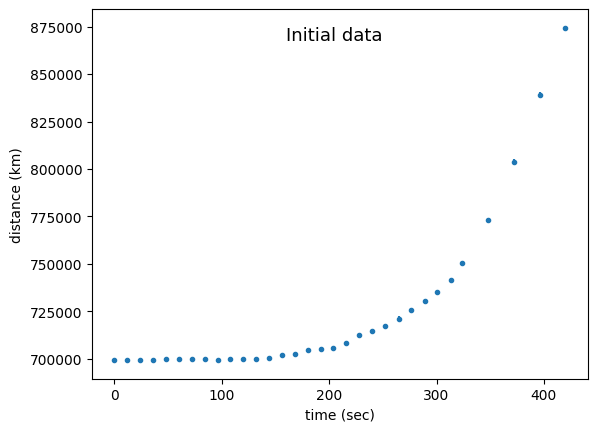

In [3]:
plt.errorbar(t_height, height*725, err_height*725,fmt='.')
plt.xlabel('time (sec)')
plt.ylabel('distance (km)')
plt.text(250, 875000, 'Initial data',
         #rotation=45,
         horizontalalignment='right',
         verticalalignment='top',
         multialignment='center',
         color = 'black',
         size = 13)
plt.show()

Первое, что мы хотим получить - это скорость. Чтобы воспользоваться методом регуляризации необходимо подобрать параметр *alpha*. Для этого зададим параметры *ord = 3* (так как после этого мы хотим получить гладкую функцию ускорения) и *print_parametrs = 3*

Сначала подберем степень *alpha*, ориентируясь на *qutient*, а затем числа после запятой.

In [22]:
reg.regularization(height, t_height, err_height, alpha=1.5e11, ord=3, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.5758624061380799
reduced chi2 for integrated regularization results =  0.4523874717777187


(array([  6.77419355,  20.32258065,  33.87096774,  47.41935484,
         60.96774194,  74.51612903,  88.06451613, 101.61290323,
        115.16129032, 128.70967742, 142.25806452, 155.80645161,
        169.35483871, 182.90322581, 196.4516129 , 210.        ,
        223.5483871 , 237.09677419, 250.64516129, 264.19354839,
        277.74193548, 291.29032258, 304.83870968, 318.38709677,
        331.93548387, 345.48387097, 359.03225806, 372.58064516,
        386.12903226, 399.67741935, 413.22580645]),
 array([ 2.90793895e-02,  1.53737289e-02,  4.65140974e-03, -2.86290709e-03,
        -6.48661575e-03, -5.19374718e-03,  2.01534985e-03,  1.56815422e-02,
         3.56275440e-02,  6.09264633e-02,  9.00344288e-02,  1.21184581e-01,
         1.52848620e-01,  1.84035667e-01,  2.14619715e-01,  2.45730902e-01,
         2.80503287e-01,  3.24567643e-01,  3.85387442e-01,  4.70715102e-01,
         5.86710754e-01,  7.35972110e-01,  9.15927690e-01,  1.11865669e+00,
         1.33244235e+00,  1.54441093e+00,  1

Мы подобрали alpha, чтобы коэффициент *quotient* был равен 0.57 с хорошим $\chi^2$. Почему мы не добились *quotient=1*? Ответ на этот вопрос в обратном интегрировании полученных скоростей. Если бы мы работали с *quotient = 1*, то получили бы достаточно гладкую функцию, но функция, полученная обратным интегрированием, сильно бы отличалась от начальной.  Запишем полученные значения скоростей:

In [27]:
t_vel, vel, height_back = reg.regularization(height, t_height, err_height, alpha=1.5e11, ord=3, print_parameters=False, mk=False)

Теперь найдем ошибки полученных скоростей методом Монте-Карло. Для этого выставим параметр *mk = True*. Параметр *num_mk = 100* по умолчанию, мы его менять не будем. Запишем результаты в соответствующие переменные

In [29]:
t_vel, vel_mk, err_vel = reg.regularization(height, t_height, err_height, alpha=1.5e11, ord=3, print_parameters=False, mk=True)

100%|██████████| 100/100 [00:21<00:00,  4.74it/s]


Посмотрим, что у нас получилось

Text(0.5, 0, 'time (sec)')

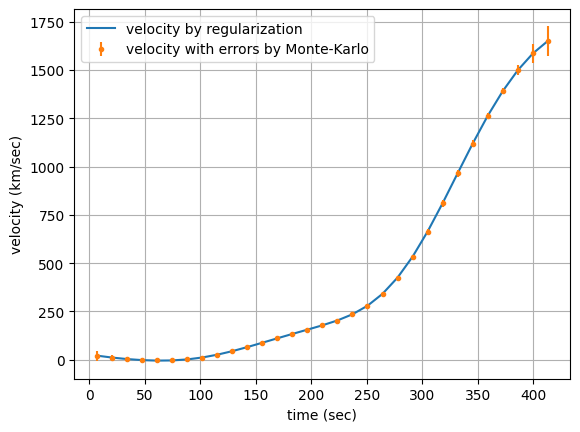

In [30]:
fig, ax = plt.subplots()
ax.plot(t_vel,vel*725, label = 'velocity by regularization')
ax.errorbar(t_vel,vel_mk*725,err_vel*725,fmt='.', label = 'velocity with errors by Monte-Karlo')
ax.legend()
ax.grid()
ax.set_ylabel('velocity (km/sec)')
ax.set_xlabel('time (sec)')

Построим на одном графике наши начальные данные и проинтегрированнeю скорость, полученную методом регуляризации, чтобы сравнить насколько они отличаются и насколько хорошо мы попали в изначально заданные ошибки:

Text(0, 0.5, 'error overrun')

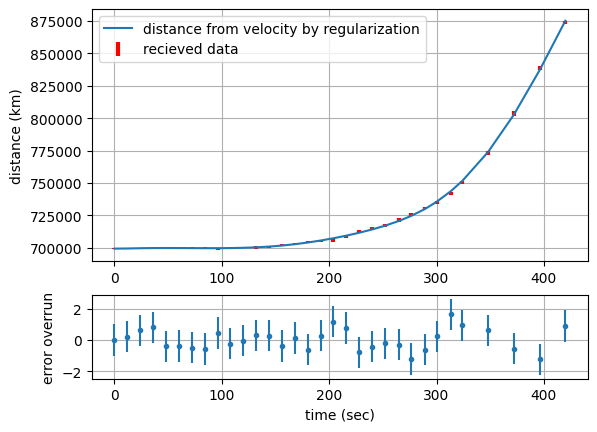

In [50]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(t_height, height*725,err_height*725,fmt='none',ecolor='r',elinewidth=3, label = 'recieved data')
ax[0].plot(t_height, height_back*725, label = 'distance from velocity by regularization')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('distance (km)')

ax[1].errorbar(t_height, (height_back-height)/err_height,1,fmt='.')
ax[1].grid()
ax[1].set_xlabel('time (sec)')
ax[1].set_ylabel('error overrun')

А вот что было бы, если бы мы взяли *quotient = 1*:

In [33]:
t_vel_1, vel_1, height_back_1 = reg.regularization(height, t_height, err_height, alpha=5.39e11, ord=3, print_parameters=False, mk=False)
t_vel_1, vel_mk_1, err_vel_1 = reg.regularization(height, t_height, err_height, alpha=5.39e11, ord=3, print_parameters=False, mk=True)

100%|██████████| 100/100 [00:19<00:00,  5.03it/s]


Text(0, 0.5, 'error overrun')

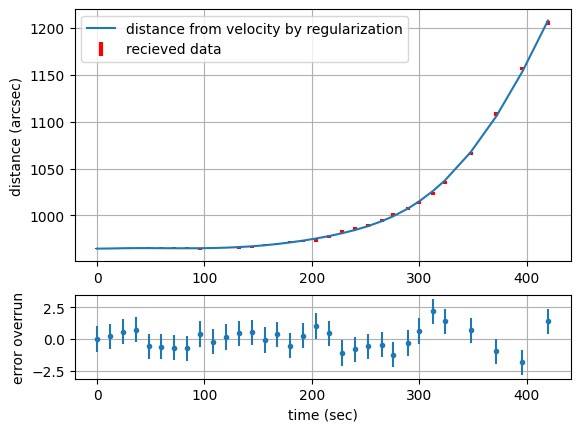

In [48]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(t_height, height,err_height,fmt='none',ecolor='r',elinewidth=3, label = 'recieved data')
ax[0].plot(t_height, height_back_1, label = 'distance from velocity by regularization')
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel('distance (arcsec)')

ax[1].errorbar(t_height, (height_back_1-height)/err_height,1,fmt='.')
ax[1].grid()
ax[1].set_xlabel('time (sec)')
ax[1].set_ylabel('error overrun')

Как видно, полученная функция сильно хуже ложиться на начальные данные, поэтому построение данного графика является еще одним критерием отбора *alpha*

Теперь найдем ускорение. Выставим *ord = 2* и, как в предыдущем пункте, для начала определим необходимое *alpha* 

In [51]:
reg.regularization(vel, t_vel, err_vel, alpha=1e8, ord=2, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.06299222098967365
reduced chi2 for integrated regularization results =  0.17207657864789364


(array([ 13.5483871 ,  27.09677419,  40.64516129,  54.19354839,
         67.74193548,  81.29032258,  94.83870968, 108.38709677,
        121.93548387, 135.48387097, 149.03225806, 162.58064516,
        176.12903226, 189.67741935, 203.22580645, 216.77419355,
        230.32258065, 243.87096774, 257.41935484, 270.96774194,
        284.51612903, 298.06451613, 311.61290323, 325.16129032,
        338.70967742, 352.25806452, 365.80645161, 379.35483871,
        392.90322581, 406.4516129 ]),
 array([-1.37186805e-03, -9.21904857e-04, -4.73080840e-04, -2.01683043e-05,
         4.40114346e-04,  8.99287137e-04,  1.33361817e-03,  1.70931768e-03,
         1.99037838e-03,  2.14922751e-03,  2.18188333e-03,  2.12184599e-03,
         2.04698294e-03,  2.07642458e-03,  2.35298204e-03,  3.01192226e-03,
         4.14357572e-03,  5.75805297e-03,  7.76322507e-03,  9.96439624e-03,
         1.20919440e-02,  1.38556537e-02,  1.50099771e-02,  1.54071586e-02,
         1.50236776e-02,  1.39543786e-02,  1.23747872e-02,

Запишем полученные значения ускорений и найдем ошибки методом Монте-Карло:

In [52]:
t_acc, acc, vel_back = reg.regularization(vel, t_vel, err_vel, alpha=1e8, ord=2, print_parameters=True, mk=False)

Optimization terminated successfully
quotient = 0.06299222098967365
reduced chi2 for integrated regularization results =  0.17207657864789364


In [53]:
t_acc, acc_mk, err_acc = reg.regularization(vel, t_vel, err_vel, alpha=1e8, ord=2, print_parameters=True, mk=True)

Optimization terminated successfully
quotient = 0.06299222098967365
reduced chi2 for integrated regularization results =  0.17207657864789364


100%|██████████| 100/100 [00:15<00:00,  6.39it/s]


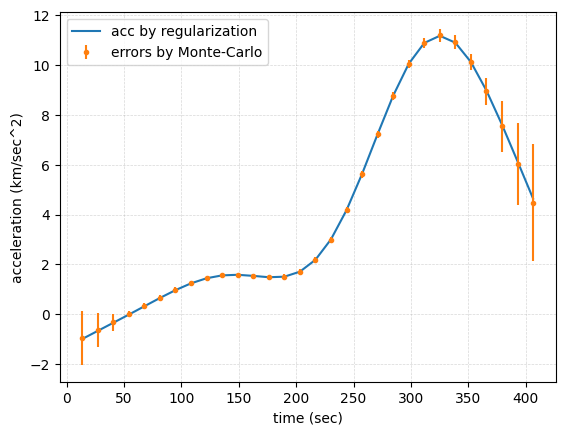

In [54]:
plt.plot(t_acc,acc*725, label = 'acc by regularization')
plt.errorbar(t_acc,acc_mk*725,err_acc*725,fmt='.', label = 'errors by Monte-Carlo')

plt.xlabel('time (sec)')
plt.ylabel('acceleration (km/sec^2)')

plt.grid(linestyle = '--',linewidth = 0.5, alpha=0.5)
plt.legend()
plt.show()

Снова видим сильное увеличение ошибок на хвостах из-за особенностей метода Монте-Карло

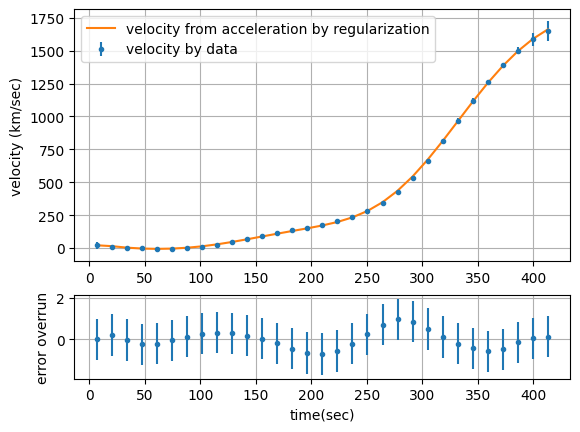

In [55]:
fig, ax = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(t_vel, vel*725,err_vel*725,fmt='.', label = 'velocity by data')
ax[0].plot(t_vel, vel_back*725, label = 'velocity from acceleration by regularization')
ax[0].set_ylabel('velocity (km/sec)')
ax[0].grid()
ax[0].legend()

ax[1].errorbar(t_vel, (vel_back-vel)/err_vel,1,fmt='.')
ax[1].set_ylabel('error overrun')
ax[1].set_xlabel('time(sec)')
plt.grid()